In [31]:
from argparse import Namespace
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets 
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

In [32]:
args = Namespace(
    seed=1234,
    train_size=0.75,
    test_size=0.25,
    emp_num=30,
    penalty=[0.01, 0.1, 1] # higher penalty indicates higher accuracy but weaker generalisation
)
np.random.seed(args.seed)

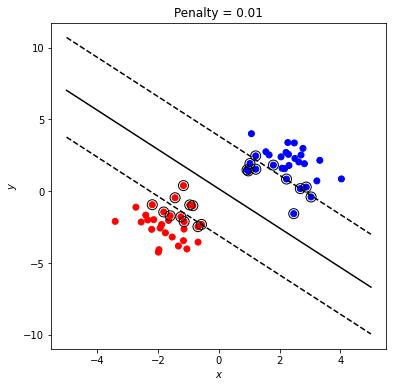

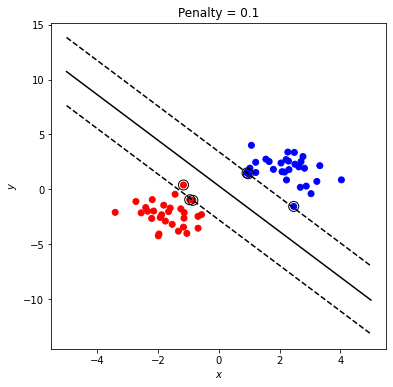

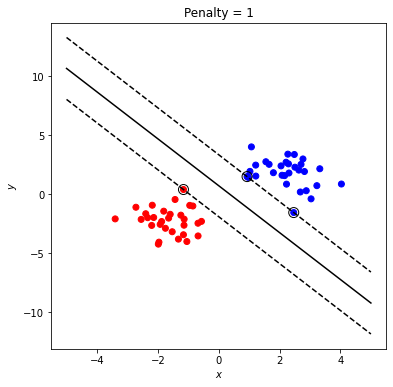

In [33]:
emp_X = np.r_[np.random.randn(args.emp_num, 2) - [2, 2], np.random.randn(args.emp_num, 2) + [2, 2]] # a simple 1d example for visual illustration
emp_y = [0] * args.emp_num + [1] * args.emp_num

for penalty in args.penalty:
    emp_svm = SVC(kernel='linear', C=penalty)
    emp_svm.fit(emp_X, emp_y)
    
    w = emp_svm.coef_[0]
    b = emp_svm.intercept_[0]
    
    a = -w[0]/w[1]
    sv_1 = emp_svm.support_vectors_[0]
    sv_2 = emp_svm.support_vectors_[-1]
    color_seq = ['red' if y == 0 else 'blue' for y in emp_y]
    
    xx = np.linspace(-5, 5)
    yy = a * xx - b/w[1] # plot the separating hyperplane
    yy_1 = a * xx + sv_1[1]- a * sv_1[0] # plot the separating hyperplane
    yy_2 = a * xx + sv_2[1]- a * sv_2[0] 
    
    plt.figure(args.penalty.index(penalty)+1, figsize=(6, 6))
    plt.scatter([x[0] for x in emp_X], [x[1] for x in emp_X], c=color_seq)
    plt.plot(xx, yy, 'k-')
    plt.plot(xx, yy_1, 'k--')
    plt.plot(xx, yy_2, 'k--')
    plt.xlabel('$x$')
    plt.ylabel('$y$')
    plt.scatter(emp_svm.support_vectors_[:, 0],
                emp_svm.support_vectors_[:, 1],
                s=100,
                facecolors='none',
                edgecolors='k')
    plt.title('Penalty = {}'.format(penalty))
    plt.show()
    

In [34]:
dataset = datasets.load_iris(as_frame=True)
X_train, X_test, y_train, y_test = train_test_split(
    dataset.data, dataset.target, train_size=args.train_size, test_size=args.test_size, random_state=args.seed)
X_scaler = StandardScaler().fit(X_train) # standardize the train and test sets
#y_scaler = StandardScaler().fit(y_train.values.reshape(-1,1)) 
standardized_X_train = X_scaler.transform(X_train)
#standardized_y_train = y_scaler.transform(y_train.values.reshape(-1,1)).ravel()
standardized_X_test = X_scaler.transform(X_test)
#standardized_y_test = y_scaler.transform(y_test.values.reshape(-1,1)).ravel()
svm = SVC(kernel='linear')
svm.fit(standardized_X_train, y_train)  
pred_train = svm.predict(standardized_X_train) 
pred_test = svm.predict(standardized_X_test)
train_acc = accuracy_score(y_train, pred_train)
test_acc = accuracy_score(y_test, pred_test)
print ("train acc: {0:.2f}, test acc: {1:.2f}".format(train_acc, test_acc))
cm = confusion_matrix(y_test, pred_test)
cm

train acc: 0.98, test acc: 0.95


array([[13,  0,  0],
       [ 0, 14,  1],
       [ 0,  1,  9]])